In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from astropy.io import fits

data_folder = '/home/tjancic/Data Lab 2/'

In [2]:
def peaks(data,threshold):
    x = data[0]
    y = data[1]
    peak_points = []
    i = 2
    while i <= len(x)-2:
        #check if value is bigger than both the 2 before and 2 after and is bigger than the threshold
        if y[i-2] < y[i] and y[i-1] < y[i] and y[i] >= y[i+1] and y[i] > y[i+2] and y[i] >= threshold:
            peak_points.append(x[i])
        i = i + 1
    return peak_points

def peaks2(x,y,threshold): #for data that is seperated into x and y
    peak_points = []
    i = 2
    while i <= len(x)-2:
        #check if value is bigger than both the 2 before and 2 after and is bigger than the threshold
        if y[i-2] < y[i] and y[i-1] < y[i] and y[i] >= y[i+1] and y[i] > y[i+2] and y[i] >= threshold:
            peak_points.append(x[i])
        i = i + 1
    return peak_points

def centroid(data,peak,pixel_width):
    x = data[0]
    y = data[1]
    xmin = int(peak) - int(pixel_width/2)
    xmax = int(peak) + int(pixel_width/2)
    x_values = x[xmin:xmax+1]
    y_values = y[xmin:xmax+1]
    centroid = np.sum(x_values*y_values)/np.sum(y_values)
    return centroid

def centroid_error(data,peak,pixel_width):
    x = data[0]
    y = data[1]
    xmin = int(peak) - int(pixel_width/2)
    xmax = int(peak) + int(pixel_width/2)
    x_values = x[xmin:xmax+1]
    y_values = y[xmin:xmax+1]
    centroid = np.sum(x_values*y_values)/np.sum(y_values)
    centroid_error = np.sum(y_values*(x_values - centroid)**2)/np.sum(y_values**2)
    return centroid_error

In [217]:
data_files = [s for s in os.listdir(data_folder) if "H_10ms" in s]
data_H = np.empty(len(data_files),dtype='object')
for i in range(len(data_files)):
    data_H[i] = np.transpose(np.loadtxt(data_folder + data_files[i],skiprows=17,comments='>'))
    
data_files = [s for s in os.listdir(data_folder) if "FlourBulb_10ms" in s]
data_flo = np.empty(len(data_files),dtype='object')
for i in range(len(data_files)):
    data_flo[i] = np.transpose(np.loadtxt(data_folder + data_files[i],skiprows=17,comments='>'))
    
data_files = [s for s in os.listdir(data_folder) if "bias_10ms" in s]
data_dark = np.empty(len(data_files),dtype='object')
for i in range(len(data_files)):
    data_dark[i] = np.transpose(np.loadtxt(data_folder + data_files[i],skiprows=17,comments='>'))

data_files = [s for s in os.listdir(data_folder) if "He_10ms" in s]
data_He = np.empty(len(data_files),dtype='object')
for i in range(len(data_files)):
    data_He[i] = np.transpose(np.loadtxt(data_folder + data_files[i],skiprows=17,comments='>'))
    
data_files = [s for s in os.listdir(data_folder) if "Hg_10ms" in s]
data_Hg = np.empty(len(data_files),dtype='object')
for i in range(len(data_files)):
    data_Hg[i] = np.transpose(np.loadtxt(data_folder + data_files[i],skiprows=17,comments='>'))
    
data_files = [s for s in os.listdir(data_folder) if "Ne_10ms" in s]
data_Ne = np.empty(len(data_files),dtype='object')
for i in range(len(data_files)):
    data_Ne[i] = np.transpose(np.loadtxt(data_folder + data_files[i],skiprows=17,comments='>'))
    
data_files = [s for s in os.listdir(data_folder) if "sun_10ms" in s]
data_sun = np.empty(len(data_files),dtype='object')
for i in range(len(data_files)):
    data_sun[i] = np.transpose(np.loadtxt(data_folder + data_files[i],skiprows=17,comments='>'))

In [218]:
#make average dark
temp = np.zeros((len(data_dark[0]),len(data_dark[0][0])))
temp[0] = data_dark[0][0]
count = 0
for x in data_dark:
    temp[1] = temp[1] + x[1]
    count = count + 1
temp[1] = temp[1]/count
average_dark = temp

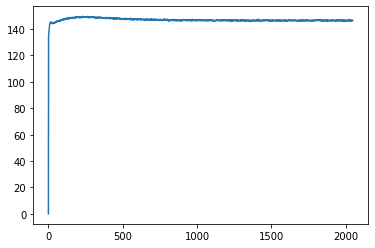

In [23]:
plt.plot(average_dark[0],average_dark[1])

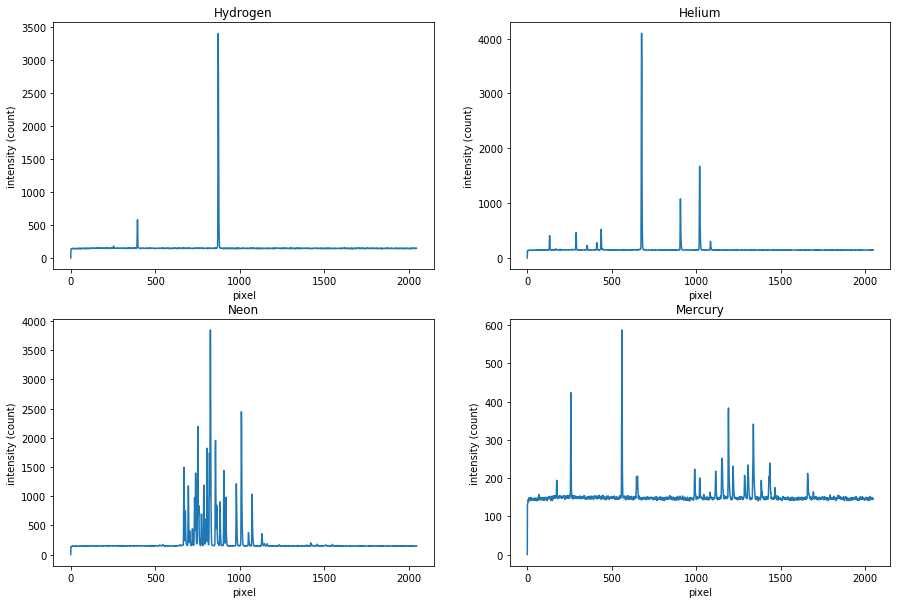

In [190]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title("Hydrogen")
plt.xlabel("pixel")
plt.ylabel("intensity (count)")
plt.plot(data_H[0][0],data_H[0][1])

plt.subplot(2, 2, 2)
plt.title("Helium")
plt.xlabel("pixel")
plt.ylabel("intensity (count)")
plt.plot(data_He[0][0],data_He[0][1])

plt.subplot(2, 2, 3)
plt.title("Neon")
plt.xlabel("pixel")
plt.ylabel("intensity (count)")
plt.plot(data_Ne[0][0],data_Ne[0][1])

plt.subplot(2, 2, 4)
plt.title("Mercury")
plt.xlabel("pixel")
plt.ylabel("intensity (count)")
plt.plot(data_Hg[0][0],data_Hg[0][1])
#plt.xlim(650,1150)

(-20, 600)

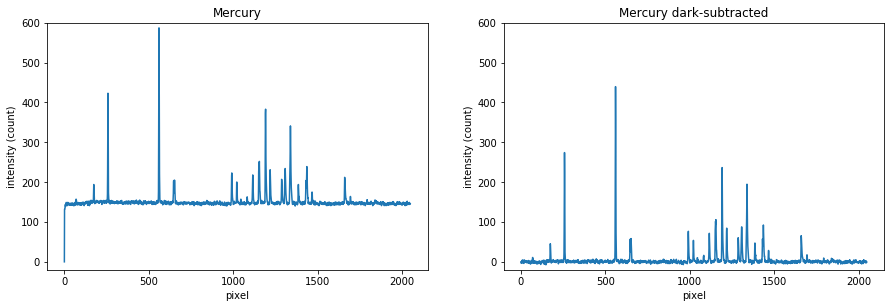

In [196]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title("Mercury")
plt.xlabel("pixel")
plt.ylabel("intensity (count)")
plt.plot(data_Hg[0][0],data_Hg[0][1])
plt.ylim(-20,600)

plt.subplot(2, 2, 2)
plt.title("Mercury dark-subtracted")
plt.xlabel("pixel")
plt.ylabel("intensity (count)")
plt.plot(data_Hg[0][0],data_Hg[0][1]-average_dark[1])
plt.ylim(-20,600)

(200, 1000)

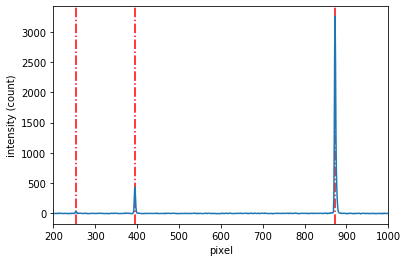

In [223]:
for x in peaks(data_H[0],thresh_H):
    plt.axvline(x,color='red',ls='-.')

plt.xlabel("pixel")
plt.ylabel("intensity (count)")
plt.plot(data_H[0][0],data_H[0][1]-average_dark[1])
plt.xlim(200,1000)

In [4]:
thresh_H = 170
thresh_He = 200
thresh_Hg = 180
thresh_Ne = 500

(650, 1150)

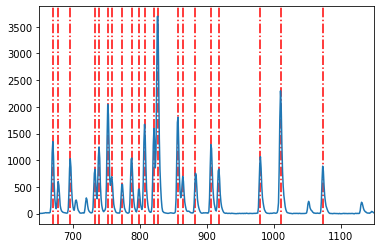

In [24]:
for x in peaks(data_Ne[0],thresh_Ne):
    plt.axvline(x,color='red',ls='-.')

plt.plot(data_Ne[0][0],data_Ne[0][1]-average_dark[1])
plt.xlim(650,1150)

(670, 680)

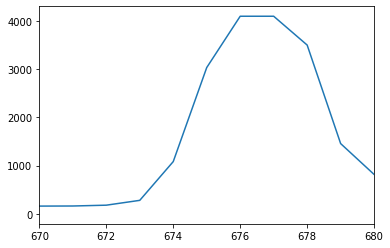

In [6]:
plt.plot(data_He[0][0],data_He[0][1])
plt.xlim(670,680)

(815, 830)

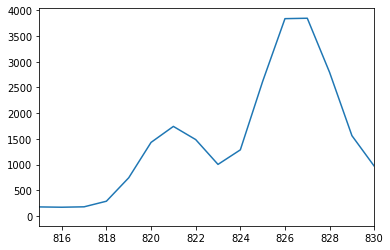

In [7]:

plt.plot(data_Ne[0][0],data_Ne[0][1])
#plt.ylim(0,200)
plt.xlim(815,830)

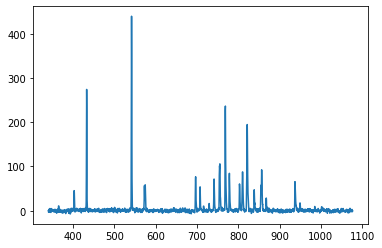

In [25]:
# for x in peaks(data_Ne[0],thresh_Ne):
#     plt.axvline(x,color='red',ls='-.')

plt.plot(data_Hg[0][0]*0.36 + 340,data_Hg[0][1]-average_dark[1])
#plt.ylim(0,200)
#plt.xlim(550,770)

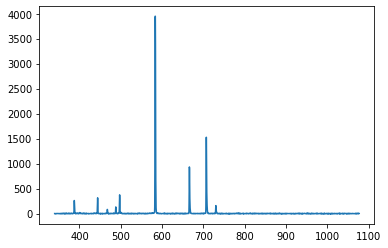

In [27]:
# for x in peaks(data_Ne[0],thresh_Ne):
#     plt.axvline(x,color='red',ls='-.')

plt.plot(data_He[0][0]*0.36 + 340,data_He[0][1]-average_dark[1])
#plt.ylim(0,200)
#plt.xlim(550,770)

In [36]:
test = data_Ne[0][0]*0.36 + 340
test = [round(x) for x in test]
test = np.array([test,data_Ne[0][1]])
test_peaks = peaks(test,thresh_Ne)
print(peaks(test,thresh_Ne))

[581.0, 584.0, 591.0, 604.0, 606.0, 611.0, 613.0, 618.0, 624.0, 628.0, 631.0, 636.0, 638.0, 649.0, 651.0, 658.0, 666.0, 670.0, 693.0, 704.0, 726.0]


In [37]:
#lines picked from NIST that seem to match well with the data

H_lines = np.array([434.0,486.1,656.3])
He_lines_A = np.array([3888.6489,4471.479,4713.146,4921.931,5015.678,5875.6148,6678.1517,7065.1771,7281.35])
He_lines = He_lines_A/10
Hg_lines_A = np.array([4046.563,4358.328,5460.735,5769.598,5790.663,7081.90])
Hg_lines = Hg_lines_A/10
Ne_lines_A = np.array([5852.4879,5881.8952,5944.8342,6029.9969,6074.3377,6143.0626,6163.5939,6217.2812,6266.4950,6334.4278,6382.9917,6402.248,6506.5281,6532.8822,6598.9529,6678.2762,6929.4673,7032.4131,7245.1666])
Ne_lines = Ne_lines_A/10

In [228]:
approx_width = 6

peak_list = peaks(data_H[0],thresh_H)
H_list = []
H_error = []
for z in peak_list:
    H_list.append(centroid(data_H[0],z,approx_width))
    H_error.append(centroid_error(data_H[0],z,approx_width))
H_list = np.array(H_list)
H_error = np.array(H_error)
    
peak_list = peaks(data_He[0],thresh_He)
He_list = []
He_error = []
for z in peak_list:
    He_list.append(centroid(data_He[0],z,approx_width))
    He_error.append(centroid_error(data_He[0],z,approx_width))
He_list = np.array(He_list)
He_error = np.array(He_error)

peak_list = peaks(data_Hg[0],thresh_Hg)
Hg_list = []
Hg_error = []
for z in peak_list:
    Hg_list.append(centroid(data_Hg[0],z,approx_width))
    Hg_error.append(centroid_error(data_Hg[0],z,approx_width))
Hg_list = np.array(Hg_list)
Hg_error = np.array(Hg_error)

peak_list = peaks(data_Ne[0],thresh_Ne)
Ne_list = []
Ne_error = []
for z in peak_list:
    Ne_list.append(centroid(data_Ne[0],z,approx_width))
    Ne_error.append(centroid_error(data_Ne[0],z,approx_width))
Ne_list = np.array(Ne_list)
Ne_error = np.array(Ne_error)

In [229]:
loopy = Ne_list
loopy2 = Ne_error
for i in range(len(loopy)):
    if i >= len(loopy2):
        print('{}\t{}'.format(i,loopy[i]))
    else:
        print('{}\t{}\t{}'.format(i,loopy[i],loopy2[i]))

0	670.0605263157895	0.002174649347545511
1	678.1561106155218	0.005049850799072757
2	696.1449919224556	0.0028417910145888538
3	733.0534246575343	0.0038047361091043752
4	738.9973505547276	0.0025695020049827273
5	752.3729545454545	0.0014080919376489392
6	757.6040399652476	0.004734146709924276
7	773.4039735099337	0.0049707496714927815
8	787.8913496119629	0.002909640623609882
9	798.9124012366884	0.006288320494833126
10	807.2085775173149	0.0017898737080935684
11	821.4481244511354	0.00212221918019457
12	826.7568335108272	0.0008666026994799167
13	856.9316218518068	0.0016954525067353157
14	863.979298587433	0.004920782093303072
15	883.3876418663303	0.0037017379977251994
16	906.4677685950413	0.0021501134388944546
17	917.9897595725735	0.003594727886841326
18	980.1146980630459	0.0028827792948321056
19	1010.2944152558864	0.0013241844942591158
20	1073.3825382538255	0.003291575123952232


In [230]:
print(*np.round(Hg_list,1))
print(*np.round(Hg_lines,1))

174.1 258.0 560.1 647.0 652.0 991.0 1020.1 1115.0 1153.8 1191.0 1218.0 1286.1 1306.1 1338.0 1385.0 1430.1 1435.0 1659.1
404.7 435.8 546.1 577.0 579.1 708.2


In [231]:
for i in range(len(Ne_list)):
    if i >= len(Ne_lines):
        print('{}\t{}'.format(i,round(Ne_list[i]*0.36+340,1)))
    else:
        print('{}\t{}\t{}'.format(i,round(Ne_list[i]*0.36+340,1),round(Ne_lines[i],1)))

0	581.2	585.2
1	584.1	588.2
2	590.6	594.5
3	603.9	603.0
4	606.0	607.4
5	610.9	614.3
6	612.7	616.4
7	618.4	621.7
8	623.6	626.6
9	627.6	633.4
10	630.6	638.3
11	635.7	640.2
12	637.6	650.7
13	648.5	653.3
14	651.0	659.9
15	658.0	667.8
16	666.3	692.9
17	670.5	703.2
18	692.8	724.5
19	703.7
20	726.4


In [232]:
Ne_ind = [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,18,19,20] #skips 10 and 17
Hg_list = Hg_list[range(6)] #first 6 are used in list of centroids
Ne_list = Ne_list[Ne_ind]

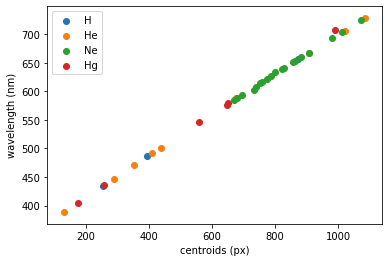

In [233]:
plt.scatter(H_list,H_lines,label='H')
plt.scatter(He_list,He_lines,label='He')
plt.scatter(Ne_list,Ne_lines,label='Ne')
plt.scatter(Hg_list,Hg_lines,label='Hg')
plt.xlabel("centroids (px)")
plt.ylabel("wavelength (nm)")
plt.legend()

In [234]:
spectrum_list = np.concatenate([H_list,He_list,Ne_list,Hg_list])
spectrum_lines = np.concatenate([H_lines,He_lines,Ne_lines,Hg_lines])

In [235]:
loopy = spectrum_list
loopy2 = spectrum_lines
for i in range(len(loopy)):
    if i >= len(loopy2):
        print('{}\t{}'.format(i,loopy[i]))
    else:
        print('{}\t{}\t{}'.format(i,round(loopy[i],1),round(loopy2[i],1)))

0	253.1	434.0
1	394.9	486.1
2	873.1	656.3
3	132.1	388.9
4	288.9	447.1
5	354.1	471.3
6	411.1	492.2
7	437.0	501.6
8	676.5	587.6
9	906.4	667.8
10	1020.1	706.5
11	1084.1	728.1
12	670.1	585.2
13	678.2	588.2
14	696.1	594.5
15	733.1	603.0
16	739.0	607.4
17	752.4	614.3
18	757.6	616.4
19	773.4	621.7
20	787.9	626.6
21	798.9	633.4
22	821.4	638.3
23	826.8	640.2
24	856.9	650.7
25	864.0	653.3
26	883.4	659.9
27	906.5	667.8
28	980.1	692.9
29	1010.3	703.2
30	1073.4	724.5
31	174.1	404.7
32	258.0	435.8
33	560.1	546.1
34	647.0	577.0
35	652.0	579.1
36	991.0	708.2


In [236]:
matrix = np.array([ [np.sum(spectrum_list**2), np.sum(spectrum_list)], [np.sum(spectrum_list),len(spectrum_list)] ])
vector = np.array([ np.sum(spectrum_list*spectrum_lines),np.sum(spectrum_lines) ])
matrixi = np.linalg.inv(matrix)
solution = np.dot(matrixi,vector)
m = solution[0]
b = solution[1]

In [237]:
x = range(100,1100)
y = m*x + b

In [238]:
N = len(spectrum_list)

variance_y = 1/(N-2)*np.sum((spectrum_lines-(m*spectrum_list + b))**2)
variance_m = N*variance_y/(N*np.sum(spectrum_list**2)-(np.sum(spectrum_list))**2)
variance_b = variance_y*np.sum(spectrum_list**2)/(N*np.sum(spectrum_list**2)-(np.sum(spectrum_list))**2)

In [247]:
b

344.33580741009428

In [248]:
round(variance_b**(1/2),3)

1.1040000000000001

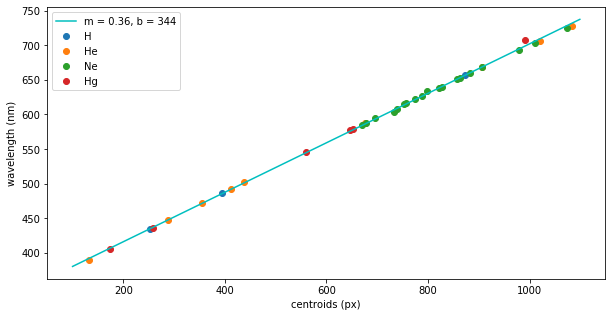

In [240]:
plt.figure(figsize=(10,5))
plt.scatter(H_list,H_lines,label='H')
#plt.errorbar(H_list,H_lines,xerr=100,fmt='o')
plt.scatter(He_list,He_lines,label='He')
plt.scatter(Ne_list,Ne_lines,label='Ne')
plt.scatter(Hg_list,Hg_lines,label='Hg')
plt.plot(x,y,'c',label='m = 0.36, b = 344')
plt.xlabel("centroids (px)")
plt.ylabel("wavelength (nm)")
plt.legend()

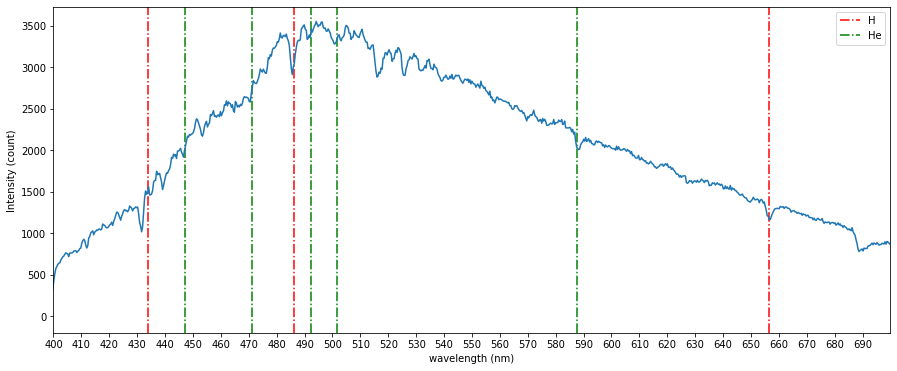

In [258]:
sun = [x for x in data_sun[0]] #Have to make deep copy -_-
sun[1] = sun[1] - average_dark[1]
sun[0] = sun[0]*m + b

plt.figure(figsize=(15,6))

plt.axvline(0,color='red',ls='-.',label="H")
plt.axvline(0,color='green',ls='-.',label="He")
for z in H_lines:
    plt.axvline(z,color='red',ls='-.')
for z in He_lines[[1,2,3,4,5]]:
    plt.axvline(z,color='green',ls='-.')


plt.plot(sun[0],sun[1])
plt.xlabel("wavelength (nm)")
plt.ylabel("Intensity (count)")
plt.xticks(range(400,700,10))
plt.xlim(400,700)
plt.legend()

(380, 700)

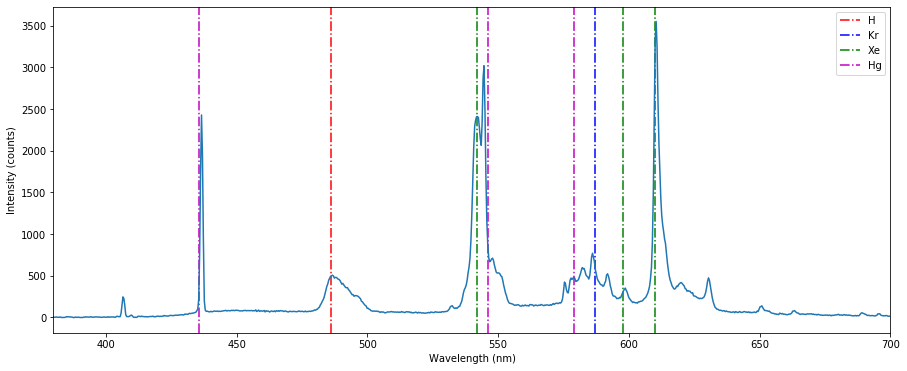

In [166]:
flo = [x for x in data_flo[0]]
flo[1] = flo[1] - average_dark[1]
flo[0] = flo[0]*m + b

plt.figure(figsize=(15,6))

Xe_lines = [541.9,597.6,609.8]
Kr_lines = 587.09160

plt.axvline(H_lines[1],color='red',ls='-.',label='H')
plt.axvline(Kr_lines,color='b',ls='-.',label='Kr')
plt.axvline(1,color='green',ls='-.',label='Xe')
plt.axvline(1,color='m',ls='-.',label='Hg')
# for z in H_lines:
#     plt.axvline(z,color='red',ls='-.')
for z in Xe_lines:
    plt.axvline(z,color='green',ls='-.')
for z in Hg_lines[[1,2,4]]:
    plt.axvline(z,color='m',ls='-.')


plt.plot(flo[0],flo[1])
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (counts)")
plt.xlim(380,700)

# KAST data

In [259]:
KAST_dir = '/datasets/phys164-fa19-public/lab2_KAST_spectra/'
KAST_blue = [s for s in os.listdir(KAST_dir) if "b1" in s]
KAST_blue.sort()

In [260]:
exposures = np.empty(len(KAST_blue),dtype='object')
object_names = np.empty(len(KAST_blue),dtype='object')

for i in range(len(KAST_blue)):
    hdu = fits.open(KAST_dir + KAST_blue[i])
    exposures[i] = hdu[0].header['EXPTIME']
    object_names[i] = hdu[0].header['OBJECT']
    hdu.close()

In [261]:
loopy = exposures
loopy2 = object_names
for i in range(len(loopy)):
    print('{}\t{}\t{}'.format(i,loopy[i],loopy2[i]))

0	40.0	Arc He, HgCd, Spare_Ar
1	0.0	bias
2	0.0	bias
3	0.0	bias
4	0.0	bias
5	0.0	bias
6	0.0	bias
7	0.0	bias
8	0.0	bias
9	0.0	bias
10	0.0	bias
11	60.0	DomeFlat 4arcsec slit
12	60.0	DomeFlat 4arcsec slit
13	60.0	DomeFlat 4arcsec slit
14	60.0	DomeFlat 4arcsec slit
15	60.0	DomeFlat 4arcsec slit
16	60.0	DomeFlat 4arcsec slit
17	60.0	DomeFlat 4arcsec slit
18	60.0	DomeFlat 4arcsec slit
19	60.0	DomeFlat 4arcsec slit
20	60.0	DomeFlat 4arcsec slit
21	90.0	DomeFlat 2arcsec slit
22	90.0	DomeFlat 2arcsec slit
23	90.0	DomeFlat 2arcsec slit
24	90.0	DomeFlat 2arcsec slit
25	90.0	DomeFlat 2arcsec slit
26	90.0	DomeFlat 2arcsec slit
27	90.0	DomeFlat 2arcsec slit
28	90.0	DomeFlat 2arcsec slit
29	90.0	DomeFlat 2arcsec slit
30	90.0	DomeFlat 2arcsec slit
31	90.0	DomeFlat 2arcsec slit
32	90.0	DomeFlat 2arcsec slit
33	90.0	DomeFlat 2arcsec slit
34	90.0	DomeFlat 2arcsec slit
35	90.0	DomeFlat 2arcsec slit
36	90.0	DomeFlat 2arcsec slit
37	90.0	DomeFlat 2arcsec slit
38	90.0	DomeFlat 2arcsec slit
39	90.0	DomeFlat 2a

In [262]:
flat_ind = [i for i in range(len(object_names)) if "4arcsec" in object_names[i]]
flat_files = [ KAST_blue[i] for i in flat_ind]
flat2_ind = [i for i in range(len(object_names)) if "2arcsec" in object_names[i]]
flat2_files = [ KAST_blue[i] for i in flat2_ind]
dark_ind = [i for i in range(len(object_names)) if "bias" in object_names[i]]
dark_files = [KAST_blue[i] for i in dark_ind]
object_ind=[i for i in range(len(object_names)) if i not in (flat_ind+flat2_ind+dark_ind)]
object_files = [KAST_blue[i] for i in object_ind]

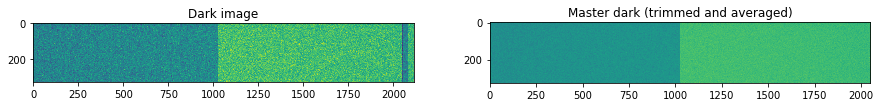

In [263]:
hdu = fits.open(KAST_dir + KAST_blue[dark_ind[0]])
test = np.array(hdu[0].data)
hdu.close()

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title("Dark image")
plt.imshow(test)

plt.subplot(2, 2, 2)
plt.title("Master dark (trimmed and averaged)")
plt.imshow(master_dark,vmin=1000,vmax=1050)

In [264]:
#set trimmed data for darks
dimension = 2048

darks = np.empty(len(dark_ind),dtype='object')
for i in range(len(dark_ind)):
    hdu = fits.open(KAST_dir + KAST_blue[dark_ind[i]])
    temp = np.array(hdu[0].data)
    darks[i] = temp[0:len(temp),0:dimension] #trim
    hdu.close()

temp_ind = flat_ind + flat2_ind
flats = np.empty(len(temp_ind),dtype='object')
for i in range(len(temp_ind)):
    hdu = fits.open(KAST_dir + KAST_blue[temp_ind[i]])
    temp = np.array(hdu[0].data)
    flats[i] = temp[0:len(temp),0:dimension] #trim
    hdu.close()
    
# flats = np.empty(len(flat2_ind),dtype='object')
# for i in range(len(flat2_ind)):
#     hdu = fits.open(KAST_dir + KAST_blue[flat2_ind[i]])
#     temp = np.array(hdu[0].data)
#     flats2[i] = temp[0:len(temp),0:dimension] #trim
#     hdu.close()
    
images = np.empty(len(object_ind),dtype='object')
for i in range(len(object_ind)):
    hdu = fits.open(KAST_dir + KAST_blue[object_ind[i]])
    temp = np.array(hdu[0].data)
    images[i] = temp[0:len(temp),0:dimension] #trim
    hdu.close()

In [265]:
def Frame_mean(data):
    temp = np.zeros((len(data[0]),len(data[0][0])))
    count = 0
    for x in data:
        temp = temp + x
        count = count + 1
    mean = np.round(temp/count)
    return mean

In [266]:
master_dark = Frame_mean(darks)

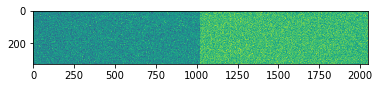

In [267]:
plt.imshow(darks[0],vmin=1000,vmax=1050)

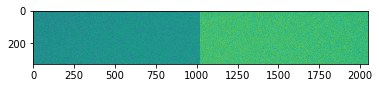

In [268]:
plt.imshow(master_dark,vmin=1000,vmax=1050)

In [269]:
len(master_dark[0])

2048

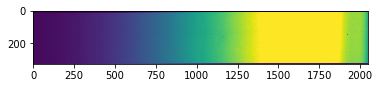

In [270]:
plt.imshow(flats[0],vmin=1100,vmax=26000)
#plt.xlim(0,2048)

In [271]:
def Normalize_flat(data): #one image at a time, must be np.array
    data_median = np.median(data)
    new_data = data/data_median
    return new_data

In [272]:
#DEBIAS FLATS, THEN NORMALIZE.
normal_flats = np.empty(len(flats),dtype='object')
for i in range(len(flats)):
    temp = flats[i] - master_dark
    normal_flats[i] = Normalize_flat(temp)

In [273]:
#take mean of normalized data (no rounding)
temp = np.zeros((len(normal_flats[0]),len(normal_flats[0][0])))
count = 0
for x in normal_flats:
    temp = temp + x
    count = count + 1
master_flat = temp/count

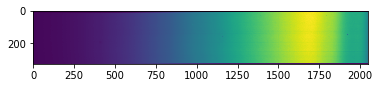

In [274]:
plt.imshow(master_flat)

In [275]:
master_flat[0]

array([ 0.00380257,  0.00373484,  0.0037426 , ...,  0.02317686,
        0.02272283,  0.02324113])

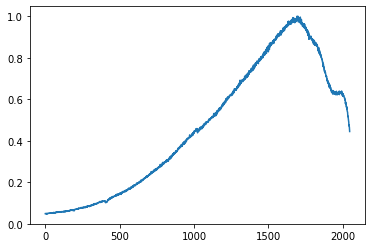

In [276]:
n = 200
x = range(len(flats[1][n]))
flat_max = max(flats[1][n])
plt.plot(x,flats[1][n]/flat_max)

b100.fits


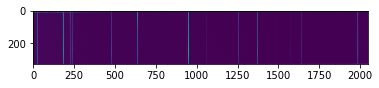

In [277]:
n = 0
print(KAST_blue[object_ind[n]])
plt.imshow((images[n]-master_dark)/master_flat)

In [278]:
arc_lamp_frame = images[0]-master_dark #(images[0]-master_dark)/master_flat
#average over columns to get one row
x = np.zeros(len(arc_lamp_frame[0]))
count = 0
for y in arc_lamp_frame[180:200]:
    x = x + y
    count = count + 1
spectrum = np.round(x/count)

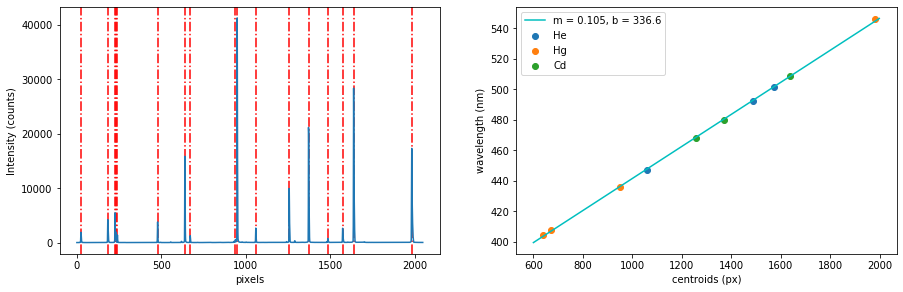

In [304]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
for z in peaks2(x2,spectrum,400):
    plt.axvline(z,color='red',ls='-.')
plt.plot(x2,spectrum)
plt.xlabel("pixels")
plt.ylabel("Intensity (counts)")

plt.subplot(2, 2, 2)
plt.scatter(arc_final[[3,6,7]],arc_He,label='He')
plt.scatter(arc_final[[0,1,2,9]],arc_Hg,label='Hg')
plt.scatter(arc_final[[4,5,8]],arc_Cd,label='Cd')
plt.plot(x,y,'c',label='m = 0.105, b = 336.6')
plt.xlabel("centroids (px)")
plt.ylabel("wavelength (nm)")
plt.legend()

Text(0, 0.5, 'Intensity (counts)')

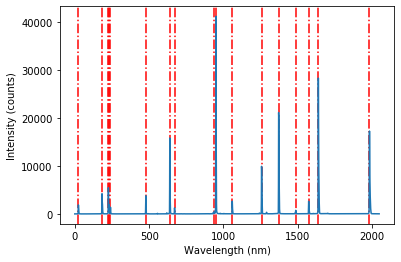

In [299]:
x2 = range(len(spectrum))

for z in peaks2(x2,spectrum,400):
    plt.axvline(z,color='red',ls='-.')

plt.plot(x,spectrum)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (counts)")
#plt.xlim(00,1100)
#plt.xlim(1400,1600)
#plt.ylim(0,4250)

In [280]:
x = range(len(spectrum))
arc_peaks = peaks2(x,spectrum,400)
input_data = np.array([x,spectrum])

approx_width = 6

arc_list = []
arc_error = []
for z in arc_peaks:
    arc_list.append(centroid(input_data,z,approx_width))
    arc_error.append(centroid_error(input_data,z,approx_width))
arc_list = np.array(arc_list)
arc_error = np.array(arc_error)

In [281]:
arc_final = arc_list[[6,7,9,10,11,12,13,14,15,16]]
arc_elem = [404.7,407.8,435.8,447.2,467.8,480.0,492.2,501.6,508.6,546.1]
arc_He = [447.2,492.2,501.6]
arc_Hg = [404.7,407.8,435.8,546.1]
arc_Cd = [467.8,480.0,508.6]

In [282]:
loopy = arc_final
#loopy2 = np.sort(np.concatenate((He_lines,Hg_lines)))
loopy2 = arc_elem
for i in range(len(loopy)):
    if i >= len(loopy2):
        print('{}\t{}'.format(i,round(loopy[i],1)))
    else:
        print('{}\t{}\t{}'.format(i,round(loopy[i],1),round(loopy2[i],1)))

0	639.6	404.7
1	671.2	407.8
2	949.4	435.8
3	1059.3	447.2
4	1256.9	467.8
5	1371.9	480.0
6	1486.2	492.2
7	1573.5	501.6
8	1638.5	508.6
9	1982.3	546.1


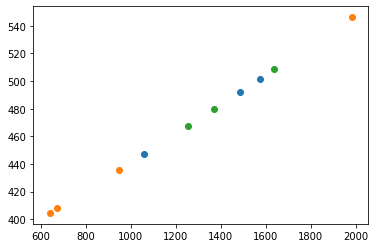

In [283]:
plt.scatter(arc_final[[3,6,7]],arc_He)
plt.scatter(arc_final[[0,1,2,9]],arc_Hg)
plt.scatter(arc_final[[4,5,8]],arc_Cd)

In [284]:
spectrum_list = arc_final
spectrum_lines = arc_elem

matrix = np.array([ [np.sum(spectrum_list**2), np.sum(spectrum_list)], [np.sum(spectrum_list),len(spectrum_list)] ])
vector = np.array([ np.sum(spectrum_list*spectrum_lines),np.sum(spectrum_lines) ])
matrixi = np.linalg.inv(matrix)
solution = np.dot(matrixi,vector)
m = solution[0]
b = solution[1]

In [288]:
N = len(spectrum_list)

variance_y = 1/(N-2)*np.sum((spectrum_lines-(m*spectrum_list + b))**2)
variance_m = N*variance_y/(N*np.sum(spectrum_list**2)-(np.sum(spectrum_list))**2)
variance_b = variance_y*np.sum(spectrum_list**2)/(N*np.sum(spectrum_list**2)-(np.sum(spectrum_list))**2)

In [295]:
b

336.57858759210103

In [292]:
variance_b**(1/2)

0.818251829075061

In [300]:
x = range(600,2000)
y = m*x + b

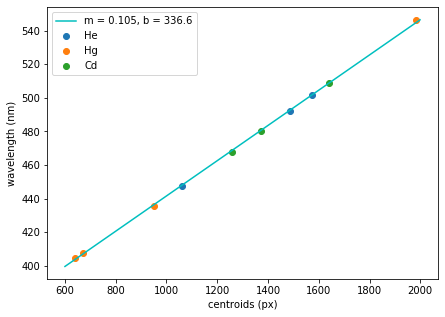

In [296]:
plt.figure(figsize=(7,5))
plt.scatter(arc_final[[3,6,7]],arc_He,label='He')
plt.scatter(arc_final[[0,1,2,9]],arc_Hg,label='Hg')
plt.scatter(arc_final[[4,5,8]],arc_Cd,label='Cd')
plt.plot(x,y,'c',label='m = 0.105, b = 336.6')
plt.xlabel("centroids (px)")
plt.ylabel("wavelength (nm)")
plt.legend()

639.5 - 404.7 Hg

671.1 - 407.8 Hg (added) 

949 - 435.8 Hg

1059.1 - 447.2 He

1256.6 - 467.8 Cd

1371.6 - 480.0 Cd

1486.0 - 492.2 He

1573.3 - 501.6 He

1638.3 - 508.6 Cd

1982.0 - 546.1 Hg

b156.fits


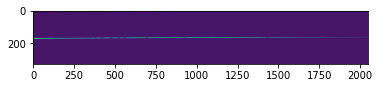

In [328]:
n = 6
print(KAST_blue[object_ind[n]])
plt.imshow((images[n]-master_dark)/master_flat)

b151.fits


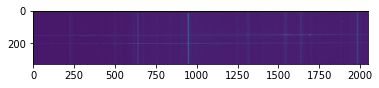

In [356]:
n = 1
print(KAST_blue[object_ind[n]])
plt.imshow((images[n]-master_dark))

# B152 spectra!

In [306]:
n=2
star_frame = (images[n]-master_dark)/master_flat
#average over rows to find FWHM
y = np.zeros(len(star_frame))
count = 0
for x in np.transpose(star_frame):
    y = x + y
    count = count + 1
star_rows = np.round(y/count)

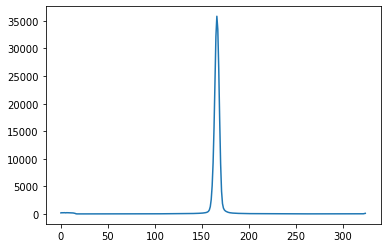

In [310]:
x2 = range(len(star_rows))
plt.plot(x2,star_rows)
#plt.xlim(00,1100)
#plt.xlim(1400,1600)
#plt.ylim(0,4250)

In [308]:
star_max = round(np.max(star_rows)/2)
star_ind = np.where(star_rows >= star_max)[0]
print(star_max)
print(star_ind)
star_rows[168]

17921.0
[164 165 166 167 168]


26417.0

In [309]:
n=2
star_frame = (images[n]-master_dark)/master_flat
#average over rows to find FWHM
x = np.zeros(len(star_frame[0]))
count = 0
for y in star_frame[star_ind]:
    x = x + y
    count = count + 1
star_spectrum = np.round(x/count)

(320, 550)

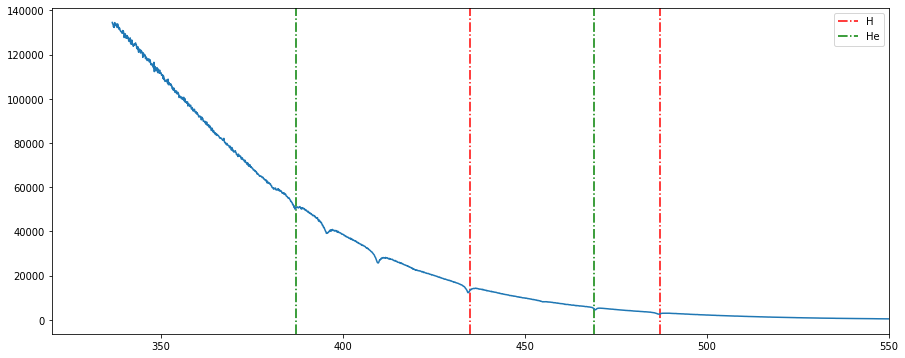

In [325]:
x = range(len(star_spectrum))
x = np.array(x)
x3 = x*m + b
#x = x*10

dipsHe = [387,469]
dipsH = [435,487]



plt.figure(figsize=(15,6))
plt.axvline(0,color='red',ls='-.',label='H')
plt.axvline(0,color='green',ls='-.',label='He')
for z in dipsHe:
    plt.axvline(z,color='green',ls='-.')
for z in dipsH:
    plt.axvline(z,color='red',ls='-.')
plt.plot(x3,star_spectrum)
plt.legend()
plt.xlim(320,550)
#plt.ylim(0,70000)

possible absorbtion lines:
380nm
387nm He
395nm 
409nm 
435nm H
469nm He
487nm H

In [326]:
He_lines

array([ 388.86489,  447.1479 ,  471.3146 ,  492.1931 ,  501.5678 ,
        587.56148,  667.81517,  706.51771,  728.135  ])

# B156 Spectra!

In [368]:
n=6
star_frame = (images[n]-master_dark)/master_flat
#average over rows to find FWHM
y = np.zeros(len(star_frame))
count = 0
for x in np.transpose(star_frame):
    y = x + y
    count = count + 1
star_rows = np.round(y/count)

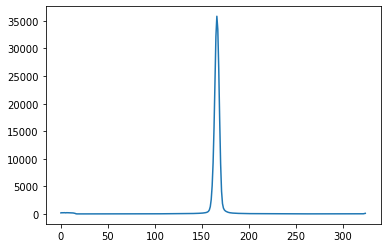

In [313]:
x1 = range(len(star_rows))

plt.plot(x1,star_rows)
#plt.xlim(00,1100)
#plt.xlim(1400,1600)
#plt.ylim(0,4250)

In [370]:
star_max = round(np.max(star_rows)/2)
star_ind = np.where(star_rows >= star_max)[0]
# star_ind = star_ind[0:5]
print(star_max)
print(star_ind)
star_rows[163]

8966.0
[164 165 166 167 168 169]


5996.0

In [316]:
n=6
star_frame = (images[n]-master_dark)/master_flat
#average over rows to find FWHM
x = np.zeros(len(star_frame[0]))
count = 0
for y in star_frame[star_ind]:
    x = x + y
    count = count + 1
star_spectrum6 = np.round(x/count)

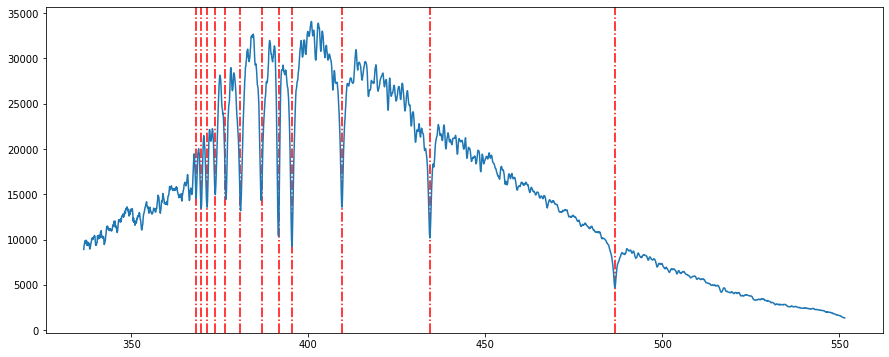

In [327]:
x = range(len(star_spectrum6))
x = np.array(x)
x = x*m + b
#x = x*10

dips = [368.2,369.6,371.4,373.6,376.6,380.8,386.8,391.6,395.5,409.5,434.5,486.6]



plt.figure(figsize=(15,6))

for z in dips:
    plt.axvline(z,color='red',ls='-.')

plt.plot(x,star_spectrum6)
#plt.xticks(range(350,500,5));
#plt.xlim(350,500)
#plt.ylim(0,70000)

Possible absorbtion lines(nm)
368.2
369.6
371.4
373.6 O? (372.7) Fe (373.48638)
376.7 Ne (377.7133)
380.8 Fe?? (382.04253)
386.8 He (388.8) Si (385.6017)
391.6 O (391.2) C (392.0693)
395.5 N (399.5) (395.585)
409.5 H (410.2)
434.5 H (434.0)
486.6 H (486.1)

In [403]:
He_lines

array([ 388.86489,  447.1479 ,  471.3146 ,  492.1931 ,  501.5678 ,
        587.56148,  667.81517,  706.51771,  728.135  ])

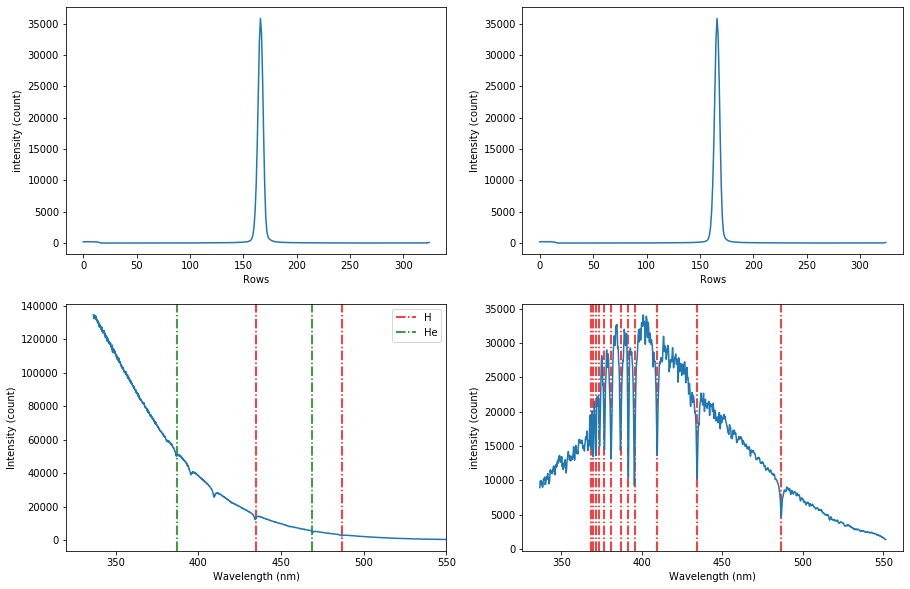

In [328]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
#plt.title("Hydrogen")
plt.xlabel("Rows")
plt.ylabel("intensity (count)")
plt.plot(x2,star_rows)

plt.subplot(2, 2, 3)
#plt.title("Helium")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (count)")
plt.axvline(0,color='red',ls='-.',label='H')
plt.axvline(0,color='green',ls='-.',label='He')
for z in dipsHe:
    plt.axvline(z,color='green',ls='-.')
for z in dipsH:
    plt.axvline(z,color='red',ls='-.')
plt.plot(x3,star_spectrum)
plt.legend()
plt.xlim(320,550)

plt.subplot(2, 2, 2)
#plt.title("Neon")
plt.xlabel("Rows")
plt.ylabel("Intensity (count)")
plt.plot(x1,star_rows)

plt.subplot(2, 2, 4)
#plt.title("Mercury")
plt.xlabel("Wavelength (nm)")
plt.ylabel("intensity (count)")
for z in dips:
    plt.axvline(z,color='red',ls='-.')
plt.plot(x,star_spectrum6)
#plt.xlim(650,1150)

# Notes

Headers: object, exptime, obstype, dsensor

set() gives unique values

(image-dark)/(flat - bias) but in this case dark is the same as bias.
flat-bias must be normallized (divide by the max of the flat)


In [1]:
data_dir = '/datasets/phys164-fa19-public/lab2_KAST_spectra/'
file_name = 'b100.fits'

In [18]:
hdu = fits.open('/datasets/phys164-fa19-public/lab2_KAST_spectra/b111.fits')

In [19]:
hdu[0].header

SIMPLE  =                    T / NORMAL FITS IMAGE                              
BITPIX  =                   16 / DATA PRECISION                                 
NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     
NAXIS1  =                 2112 / NUMBER OF COLUMNS                              
NAXIS2  =                  325 / NUMBER OF ROWS                                 
CRVAL1U =                    0 / COLUMN ORIGIN                                  
CRVAL2U =                 1255 / ROW ORIGIN                                     
CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        
CDELT2U =                   -1 / ROW CHANGE PER PIXEL                           
OBSNUM  =                  111 / OBSERVATION NUMBER                             
IDNUM   =                    5 / IMAGE ID                                       
UGEOM   =                    6 / UCAM READOUT GEOMETRY                          
DGEOM   =                   